**AQI Prediction Using Decision tree regressior**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from pathlib import Path
file_path = Path('D:\Internship\IBM Internship\Project1\Air-Quality-Index-prediction_with_deployment\ML_Applied_Word\PreProcess\df_cleaned_data.pkl')
with open(file_path,'rb') as file:
    df= pickle.load(file)

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ruchi\AppData\Local\Temp\ipykernel_51548\2755762934.py:2: SyntaxWarning: invalid escape sequence '\I'
  file_path = Path('D:\Internship\IBM Internship\Project1\Air-Quality-Index-prediction_with_deployment\ML_Applied_Word\PreProcess\df_cleaned_data.pkl')


In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### **Decision Tree Regressor Implementation without Hyper Tuning**

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Correct criterion value
dtree = DecisionTreeRegressor(criterion="squared_error", random_state=100)
dtree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=100)

In [7]:
# from sklearn.tree import DecisionTreeRegressor
# dtree=DecisionTreeRegressor(criterion="mse",random_state=100)
# dtree.fit(X_train,y_train)


In [8]:

print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.20066510635894785


#### **Model Evaluation**



In [9]:
#Prediction for test dataset
tree_prediction=dtree.predict(X_test)

In [10]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, tree_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_prediction)))

MAE: 54.25489296636086
MSE: 5550.236568233946
RMSE: 74.49990985386457


### **Checking Actual value vs Predicted Value**

In [15]:
# Check for Linearity
def actual_predict(actual,predicted):
  fig=plt.figure(figsize=(14,5))
  ax = fig.add_subplot(121)
  sns.scatterplot(actual,predicted,ax=ax,color='r',marker="+",alpha=1)
  ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
  sns.scatterplot(y_test, y_prediction, marker="+",color='g',alpha=1)
  # Check for Residual normality & mean
  ax = fig.add_subplot(122)
  sns.distplot((actual - predicted),ax=ax,color='b')
  ax.axvline((actual - predicted).mean(),color='k',linestyle='--')
  ax.set_title('Check for Residual normality & mean: \n Residual eror');

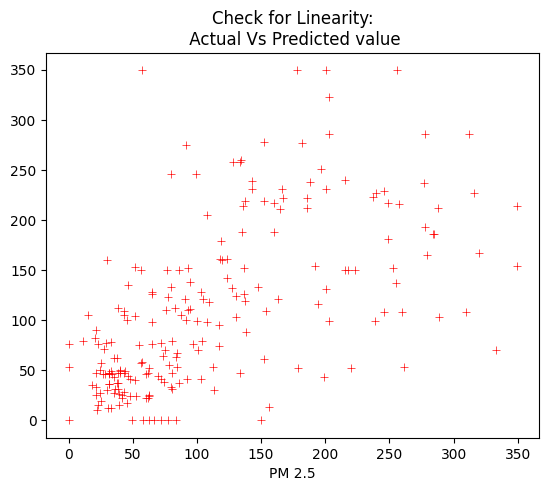

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming tree_prediction is the result of dtree.predict(X_test)
tree_prediction = dtree.predict(X_test)

# Create a scatter plot
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121)

# Correct way to use sns.scatterplot
sns.scatterplot(x=y_test, y=tree_prediction, ax=ax, color='r', marker="+", alpha=1)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

plt.show()


In [18]:
#actual_predict(y_test,tree_prediction)

In [19]:

# Quantile-Quantile plot 
def predicted_residual(actual,predicted):
  fig,ax = plt.subplots(1,2,figsize=(14,6))
  import scipy as sp
  _,(_,_,r)= sp.stats.probplot((actual-predicted),fit=True,plot=ax[0])
  ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

  #Check for Homoscedasticity
  sns.scatterplot(y = (actual-predicted), x= predicted, ax = ax[1],marker="+",color='r') 
  plt.ylabel('Residual')
  plt.xlabel('Predicted')
  ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

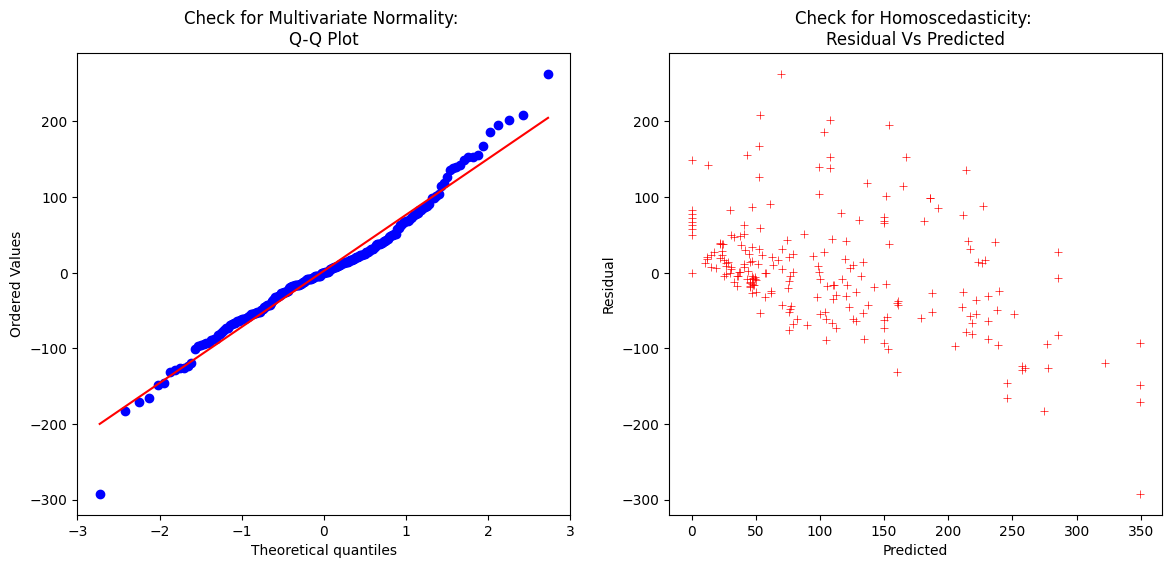

In [20]:
predicted_residual(y_test,tree_prediction)

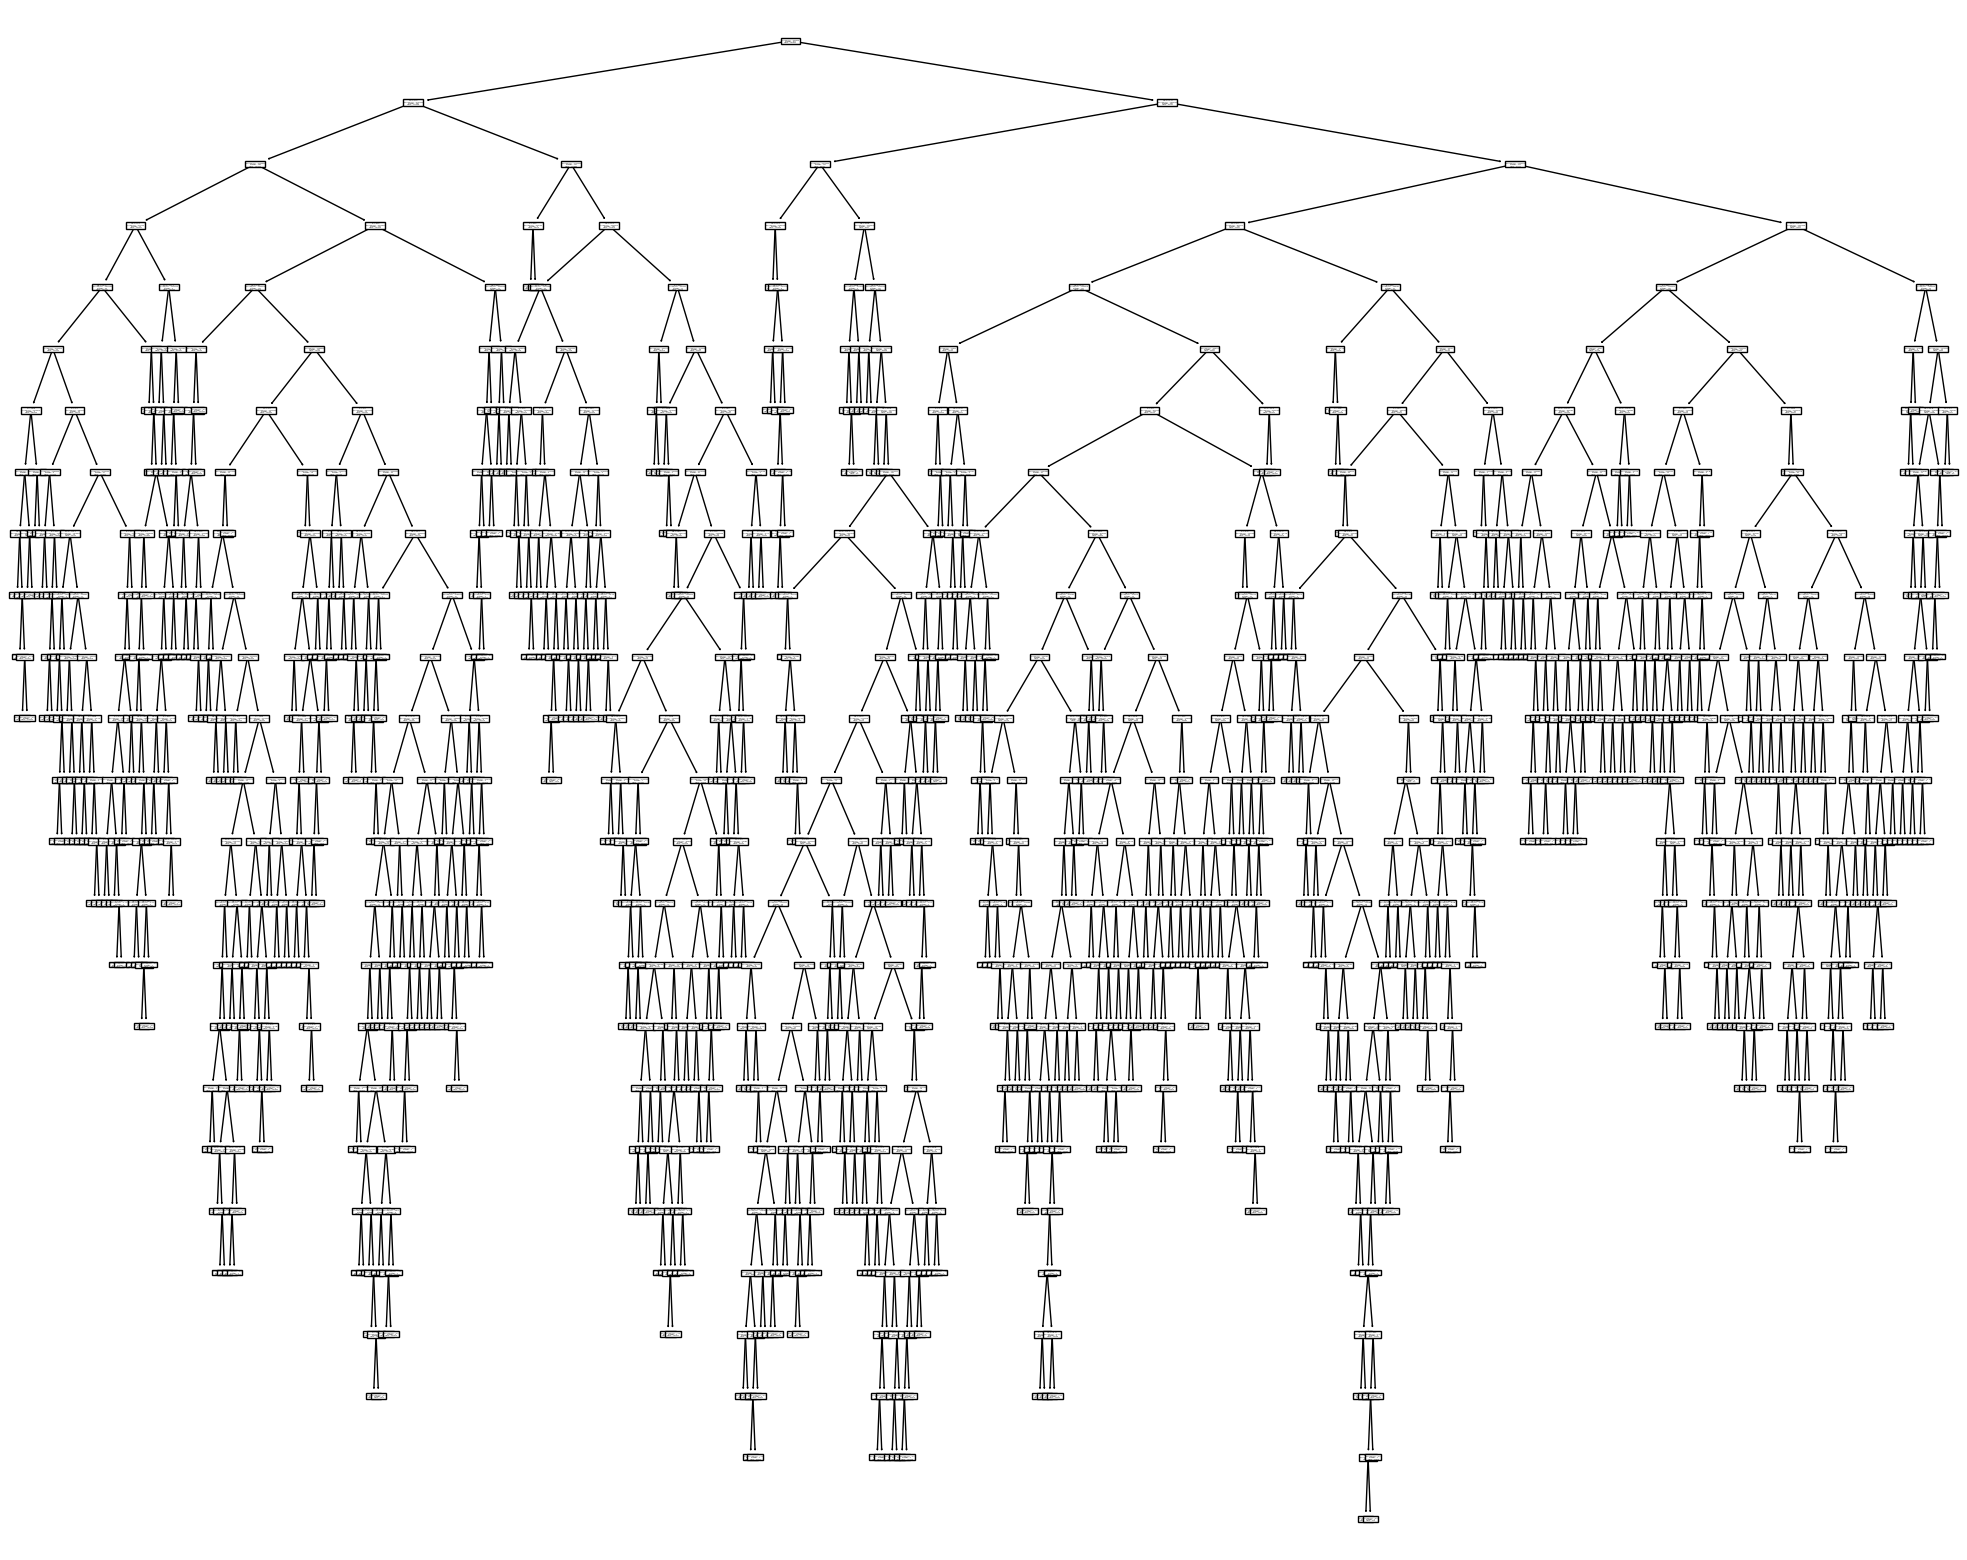

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dtree, 
                   feature_names=X.columns,  
                   filled=False)

plt.show()


In [27]:
# from sklearn import tree
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dtree, 
#                    feature_names=X.columns,  
#                    #class_names='PM 2.5',
#                    filled=False)

Decision tree  Regressor model has  RMSE(Root Mean Square Error) is around 45 without any hyperparameter tuning. So, Next, we will do hyperparameter tuning to getting a lower RMSE value.

### **Decision-Tree Regressor Implementation with Hyperparameter Tuning- Randomized SerchCV**


#### Randomized SerchCV-1

In [28]:
dtree_cv1=DecisionTreeRegressor(random_state=100)

In [29]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
#Criterion type
criterion=["mse","friedman_mse","mae"]
#Spli type 
splitter=["best","random"]
# Features
max_features=["auto","sqrt","log2"]
max_depth = [int(x) for x in np.linspace(5, 100, num = 10)]
#Subssample parameter values
min_samples_split=[int(x) for x in np.linspace(2, 50, num = 6)]


In [30]:

# Create the random grid
random_grid_1 = {'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid_1)

{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100], 'min_samples_split': [2, 11, 21, 30, 40, 50]}


In [31]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

tree_rcv1 = RandomizedSearchCV(estimator = dtree_cv1, param_distributions = random_grid_1,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)


In [32]:
tree_rcv1.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=mse, max_depth=36, max_features=log2, min_samples_split=21, splitter=random; total time=   0.0s
[CV] END criterion=mse, max_depth=36, max_features=log2, min_samples_split=21, splitter=random; total time=   0.0s
[CV] END criterion=mse, max_depth=36, max_features=log2, min_samples_split=21, splitter=random; total time=   0.0s
[CV] END criterion=mse, max_depth=36, max_features=log2, min_samples_split=21, splitter=random; total time=   0.0s
[CV] END criterion=mse, max_depth=36, max_features=log2, min_samples_split=21, splitter=random; total time=   0.0s
[CV] END criterion=mae, max_depth=68, max_features=sqrt, min_samples_split=11, splitter=random; total time=   0.0s
[CV] END criterion=mae, max_depth=68, max_features=sqrt, min_samples_split=11, splitter=random; total time=   0.0s
[CV] END criterion=mae, max_depth=68, max_features=sqrt, min_samples_split=11, splitter=random; total time=   0.0s
[CV] END criterio

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
425 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=100),
                   n_iter=100, n_jobs=1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [5, 15, 26, 36, 47, 57, 68,
                                                      78, 89, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 11, 21, 30, 40,
                                                              50],
                                        'splitter': ['best', 'random']},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
print(tree_rcv1.best_params_)
print(tree_rcv1.best_score_)

{'splitter': 'best', 'min_samples_split': 30, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'friedman_mse'}
-3037.729742082133


### **Model Evaluation-1**

In [34]:
tree_rcv1_prediction=tree_rcv1.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test,tree_rcv1_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv1_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv1_prediction)))

MAE: 45.015974626479355
MSE: 3753.2502902270953
RMSE: 61.26377633012101


#### Randomized SerchCV-2

In [35]:
dtree_cv2=DecisionTreeRegressor(random_state=100)

In [36]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
#Criterion type
criterion=["mse","friedman_mse","mae"]
#Spli type 
splitter=["best","random"]
# Features
max_features=["auto","sqrt","log2"]
max_depth = [int(x) for x in np.linspace(50, 150, num = 10)]
#Subssample parameter values
min_samples_split=[int(x) for x in np.linspace(2, 20, num = 10)]

In [37]:


# Create the random grid
random_grid_2= {'criterion': criterion,
               'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid_2)

{'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}


In [38]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

tree_rcv2 = RandomizedSearchCV(estimator = dtree_cv2, param_distributions = random_grid_2,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)

tree_rcv2.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=friedman_mse, max_depth=127, max_features=sqrt, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=127, max_features=sqrt, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=127, max_features=sqrt, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=127, max_features=sqrt, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=127, max_features=sqrt, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=mse, max_depth=50, max_features=sqrt, min_samples_split=12, splitter=rand

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
385 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=100),
                   n_iter=100, n_jobs=1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [50, 61, 72, 83, 94, 105,
                                                      116, 127, 138, 150],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'splitter': ['best', 'random']},
                   random_state=100, scoring='neg_mean_squared_error',
                   verbose=2)

### Model Evaluation -2 

In [39]:
tree_rcv2_prediction=tree_rcv2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test,tree_rcv2_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv2_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv2_prediction)))

MAE: 45.38556128366621
MSE: 3917.4635126535304
RMSE: 62.58964381312239


In [40]:
import pickle
# open a file, where you ant to store the data
file = open('dtree_randomcv1.pkl', 'wb')

# dump information to that file
pickle.dump(tree_rcv2, file)

### Conclusion 
For this decision tree regressor, we haven’t got lower RMSE values Even though, after hyperparameter tuning also, we got the same RMSE value that we got without hyperparameter tuning So, the Decision tree regressor not suitable for these problems.
